--- Data Time Series (Ekspor Migas Kuartalan) ---
         Ekspor Migas
Tanggal              
2022-Q3          3682
2022-Q4          3802
2023-Q1          3481
2023-Q2          3922
2023-Q3          3644
2023-Q4          3981
2024-Q1          3148
2024-Q2          3021


--- 1. Analisis Komponen (Visual) ---


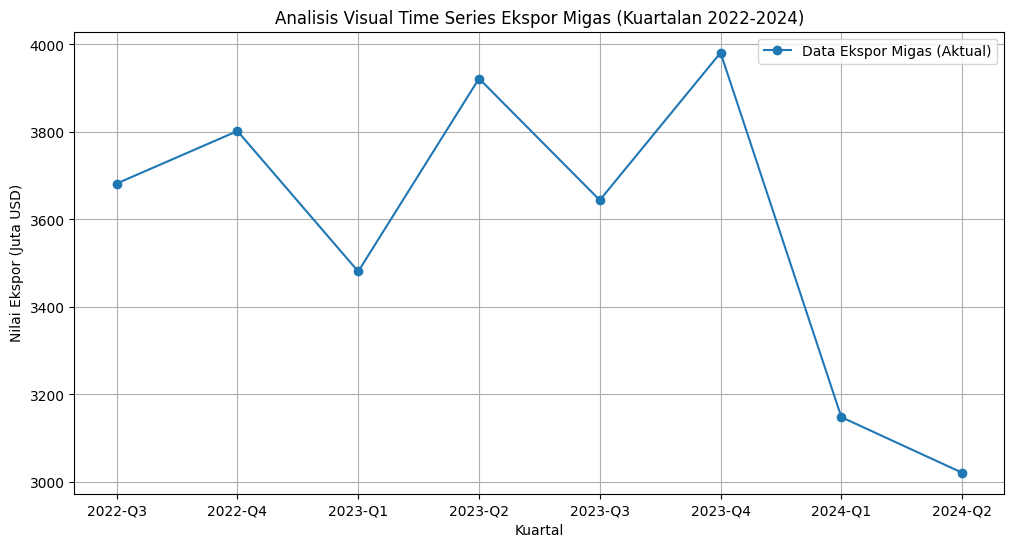


Penjelasan Analisis Komponen:
- Tren: Data berfluktuasi hingga 2023 Q4, kemudian menunjukkan TREN MENURUN yang jelas pada 2024 Q1 dan Q2.
- Musiman & Siklus: Data terlalu sedikit (hanya 8 titik/2 tahun) untuk menyimpulkan adanya pola musiman atau siklus.


--- 2 & 3. Perhitungan Moving Average (MA) dan Exponential Smoothing (ES) ---
Perhitungan MA (k=3) dan ES (alpha=0.3) selesai.
Tabel data dengan hasil forecast:
         Ekspor Migas  MA_Forecast  ES_Forecast
Tanggal                                        
2022-Q3          3682          NaN   3682.00000
2022-Q4          3802          NaN   3682.00000
2023-Q1          3481          NaN   3718.00000
2023-Q2          3922  3655.000000   3646.90000
2023-Q3          3644  3735.000000   3729.43000
2023-Q4          3981  3682.333333   3703.80100
2024-Q1          3148  3849.000000   3786.96070
2024-Q2          3021  3591.000000   3595.27249


--- 4. Perhitungan Performa (MAE & RMSE) ---
Data yang dibandingkan (setelah membuang NaN):
       

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


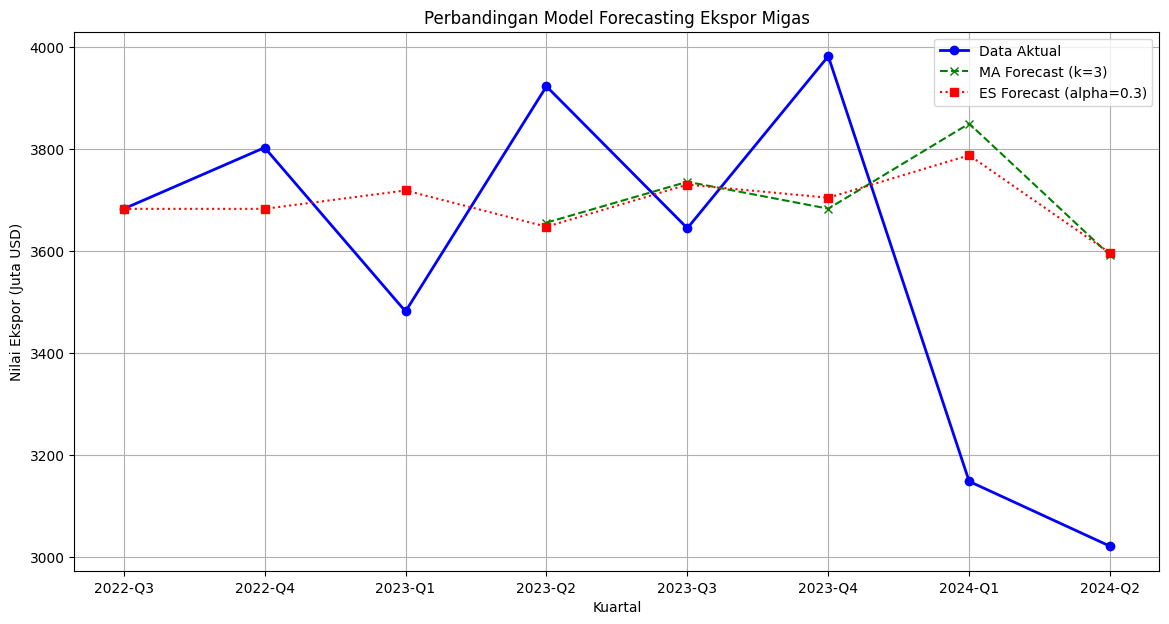

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---------------------------------------------------------------------------
# LANGKAH 1: PERSIAPAN DATA
# Data diekstrak dari Tabel V.1 (Baris 12: Ekspor Migas)
# ---------------------------------------------------------------------------

data = {
    'Tanggal': ['2022-Q3', '2022-Q4', '2023-Q1', '2023-Q2', '2023-Q3', '2023-Q4', '2024-Q1', '2024-Q2'],
    'Ekspor Migas': [3682, 3802, 3481, 3922, 3644, 3981, 3148, 3021]
}

df = pd.DataFrame(data)
df = df.set_index('Tanggal')

print("--- Data Time Series (Ekspor Migas Kuartalan) ---")
print(df)
print("\n" + "="*50 + "\n")


# ---------------------------------------------------------------------------
# LANGKAH 2: ANALISIS KOMPONEN (VISUAL)
# ---------------------------------------------------------------------------
print("--- 1. Analisis Komponen (Visual) ---")
plt.figure(figsize=(12, 6))
plt.plot(df['Ekspor Migas'], label='Data Ekspor Migas (Aktual)', marker='o')
plt.title('Analisis Visual Time Series Ekspor Migas (Kuartalan 2022-2024)')
plt.xlabel('Kuartal')
plt.ylabel('Nilai Ekspor (Juta USD)')
plt.legend()
plt.grid(True)
plt.show()

print("\nPenjelasan Analisis Komponen:")
print("- Tren: Data berfluktuasi hingga 2023 Q4, kemudian menunjukkan TREN MENURUN yang jelas pada 2024 Q1 dan Q2.")
print("- Musiman & Siklus: Data terlalu sedikit (hanya 8 titik/2 tahun) untuk menyimpulkan adanya pola musiman atau siklus.")
# INI ADALAH BARIS YANG DIPERBAIKI
print("\n" + "="*50 + "\n")


# ---------------------------------------------------------------------------
# LANGKAH 3: TIME SERIES FORECASTING
# ---------------------------------------------------------------------------
print("--- 2 & 3. Perhitungan Moving Average (MA) dan Exponential Smoothing (ES) ---")

# --- Moving Average (MA) ---
k = 3 # Jendela 3-Kuartal
# Kita .shift(1) karena kita memprediksi periode t menggunakan data dari t-1, t-2, t-3
df['MA_Forecast'] = df['Ekspor Migas'].rolling(window=k).mean().shift(1)

# --- Exponential Smoothing (ES) ---
alpha = 0.3 # Faktor penghalusan (bisa di-tuning)
model_es = SimpleExpSmoothing(df['Ekspor Migas'], initialization_method="estimated").fit(
    smoothing_level=alpha, optimized=False
)
df['ES_Forecast'] = model_es.fittedvalues

print(f"Perhitungan MA (k={k}) dan ES (alpha={alpha}) selesai.")
print("Tabel data dengan hasil forecast:")
# Menampilkan semua data karena datanya sedikit
print(df)
print("\n" + "="*50 + "\n")


# ---------------------------------------------------------------------------
# LANGKAH 4: PERHITUNGAN PERFORMA
# ---------------------------------------------------------------------------
print("--- 4. Perhitungan Performa (MAE & RMSE) ---")

# Kita harus membuang nilai NaN di awal agar perhitungan adil
# MA(k=3) akan memiliki 3 NaN di awal (karena shift(1))
df_compare = df.dropna()

print("Data yang dibandingkan (setelah membuang NaN):")
print(df_compare)
print("\n")

# Hitung Performa MA
mae_ma = mean_absolute_error(df_compare['Ekspor Migas'], df_compare['MA_Forecast'])
rmse_ma = np.sqrt(mean_squared_error(df_compare['Ekspor Migas'], df_compare['MA_Forecast']))

# Hitung Performa ES
mae_es = mean_absolute_error(df_compare['Ekspor Migas'], df_compare['ES_Forecast'])
rmse_es = np.sqrt(mean_squared_error(df_compare['Ekspor Migas'], df_compare['ES_Forecast']))

print("Performa Moving Average (MA):")
print(f"  - MAE: {mae_ma:.4f} (Semakin kecil semakin baik)")
print(f"  - RMSE: {rmse_ma:.4f} (Semakin kecil semakin baik)\n")

print("Performa Exponential Smoothing (ES):")
print(f"  - MAE: {mae_es:.4f}")
print(f"  - RMSE: {rmse_es:.4f}\n")

# ---------------------------------------------------------------------------
# LANGKAH 5: PENJELASAN HASIL PERFORMA
# ---------------------------------------------------------------------------
print("--- 5. Penjelasan Hasil Performa ---")
print("Model yang baik memiliki nilai MAE dan RMSE yang LEBIH KECIL.")
if mae_es < mae_ma:
    print(f"Kesimpulan: Exponential Smoothing (MAE: {mae_es:.4f}) sedikit lebih baik (lebih akurat)")
    print(f"daripada Moving Average (MAE: {mae_ma:.4f}) untuk memprediksi data ini.")
else:
    print(f"Kesimpulan: Moving Average (MAE: {mae_ma:.4f}) sedikit lebih baik (lebih akurat)")
    print(f"daripada Exponential Smoothing (MAE: {mae_es:.4f}) untuk memprediksi data ini.")
print("\n" + "="*50 + "\n")


# ---------------------------------------------------------------------------
# LANGKAH 6: VISUALISASI HASIL FORECAST
# ---------------------------------------------------------------------------
print("--- Visualisasi Hasil Forecasting ---")
plt.figure(figsize=(14, 7))
plt.plot(df['Ekspor Migas'], label='Data Aktual', color='blue', linewidth=2, marker='o')
plt.plot(df['MA_Forecast'], label=f'MA Forecast (k={k})', color='green', linestyle='--', marker='x')
plt.plot(df['ES_Forecast'], label=f'ES Forecast (alpha={alpha})', color='red', linestyle=':', marker='s')
plt.title('Perbandingan Model Forecasting Ekspor Migas')
plt.xlabel('Kuartal')
plt.ylabel('Nilai Ekspor (Juta USD)')
plt.legend()
plt.grid(True)
plt.show()